## Analysis

Three observable trends in the data:

1) Urban drivers make up the majority drivers, get the majority of rides, and get the largest percentage of total fares. Second is suburban drivers in all categories, and last in all categories are rural drivers.

2) Since urban drivers make up the majority of drivers, demand is less and therefore the average fare is lower. Similarly, because rural drivers are rare, a rural fare can cost 2x more than an urban fare.

3) Although urban drivers make up the majority of drivers, it may be better to be a driver in a suburban area because urban drivers get a smaller percentage of rides and fares compared to suburban areas where there are not as many drivers.

# Solution

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:


1) Average Fare ($) Per City
2) Total Number of Rides Per City
3) Total Number of Drivers Per City
4) City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:


1) % of Total Fares by City Type
2) % of Total Rides by City Type
3) % of Total Drivers by City Type

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_csv = "city_data.csv"
ride_data_csv = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_csv)
ride_data = pd.read_csv(ride_data_csv)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5628545007794
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,910050116494
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,820639054416
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9554935945413
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,720020655850


### Bubble Plot of Ridesharing Data

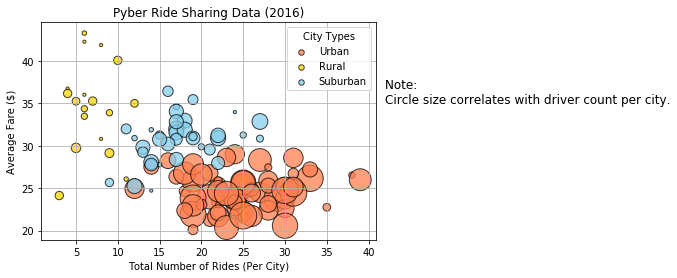

In [2]:
# Obtain the x and y coordinates for each of the three city types
# X = ride count, Y = average fare, bubbles size = avg driver count
urban_cities = city_ride_df[city_ride_df["type"] == "Urban"].groupby([city_ride_df["city"]])
rural_cities = city_ride_df[city_ride_df["type"] == "Rural"].groupby([city_ride_df["city"]])
suburban_cities = city_ride_df[city_ride_df["type"] == "Suburban"].groupby([city_ride_df["city"]])

## Urban calculations for x and y
x_urban = urban_cities["ride_id"].count()
y_urban = urban_cities["fare"].mean()
s_urban = urban_cities["driver_count"].mean()

## Rural calculations for x and y
x_rural = rural_cities["ride_id"].count()
y_rural = rural_cities["fare"].mean()
s_rural = rural_cities["driver_count"].mean()

## Suburban calculations for x and y
x_suburbs = suburban_cities["ride_id"].count()
y_suburbs = suburban_cities["fare"].mean()
s_suburbs = suburban_cities["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburbs, y_suburbs, label = "Suburban", s=s_suburbs  * 10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties (labels, legend, circle size label)
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

legend = plt.legend(fontsize = 10, title= 'City Types', loc='best') 

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# Save Figure
plt.savefig("Fig1_RideSharingData.png")

# Show plot
plt.show()

### Total Fares by City Type

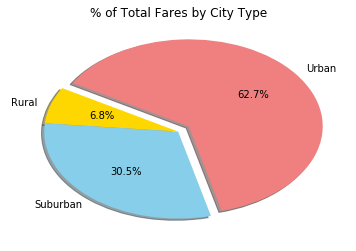

In [10]:
# Calculate Type Percents
type_group = city_ride_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum = type_group.sum()['fare']

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fig2_TotalFaresbyCityType.png")

# Show Figure
plt.show()

### Total Rides by City Type

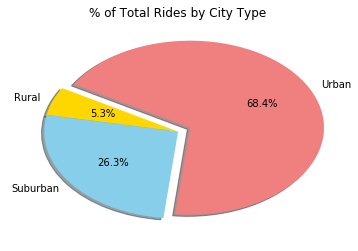

In [11]:
# Calculate Type Percents
rides_count = type_group.count()['ride_id']

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Fig3_TotalRidesbyCityType.png")

# Show Figure
plt.show()

### Total Drivers by City Type

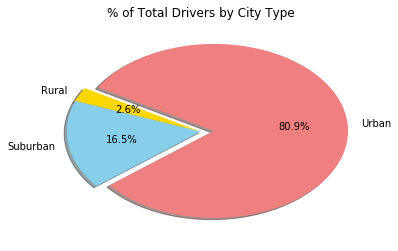

In [12]:
# Calculate Type Percents
type_group_by_drivers = city_data.groupby(['type'])
drivers_sum = type_group_by_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Fig4_TotalDriversbyCityType.png")

# Show Figure
plt.show()